1) Prepare a classification model using Naive Bayes 

for salary data 

Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
# import the model
# Load data

import pandas as pd
df = pd.read_csv("SalaryData_Train.csv")
df1 = pd.read_csv("SalaryData_Test.csv")
df.shape, df1.shape
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:xlabel='native'>

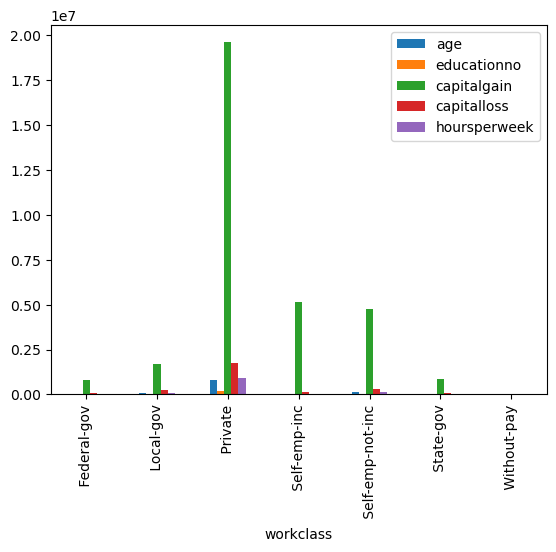

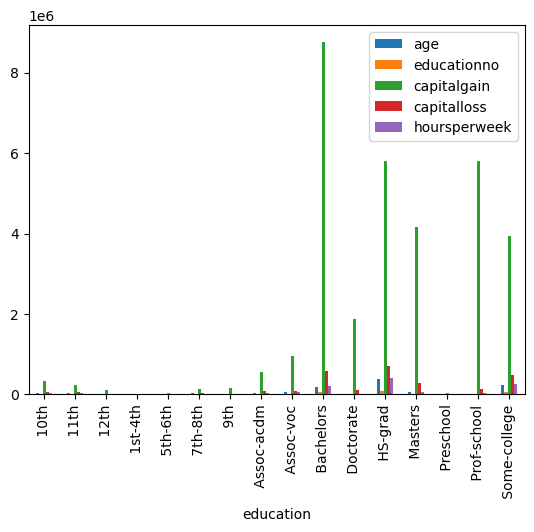

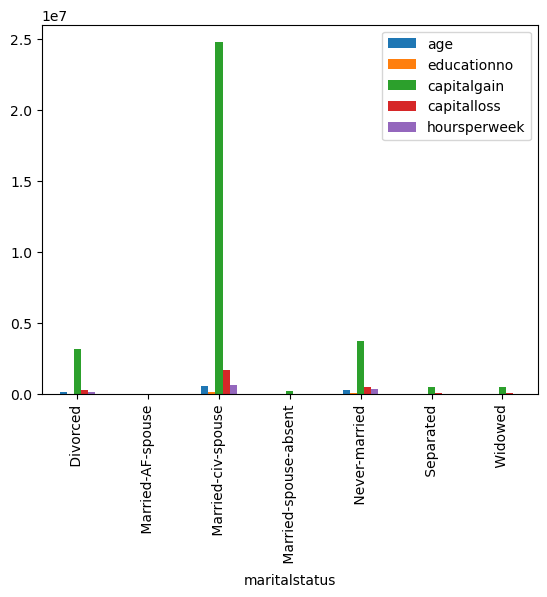

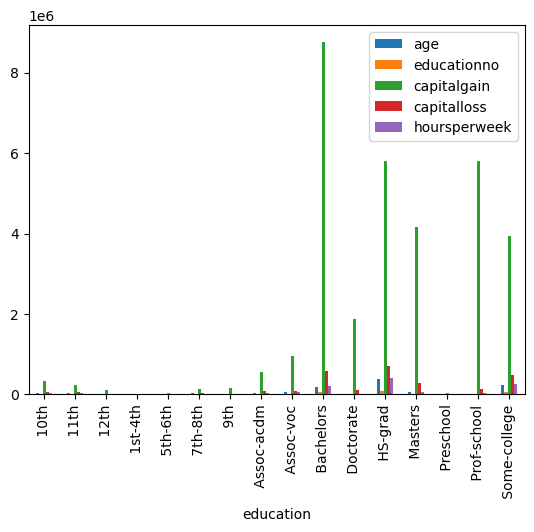

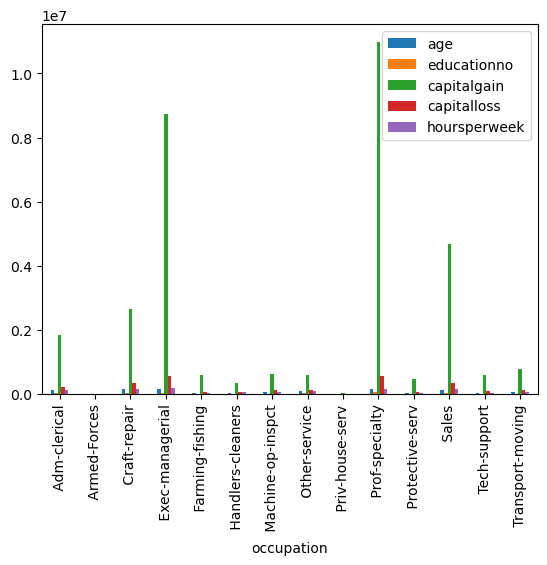

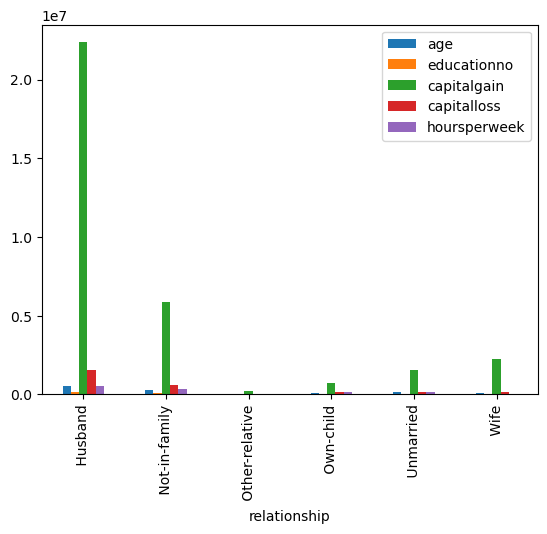

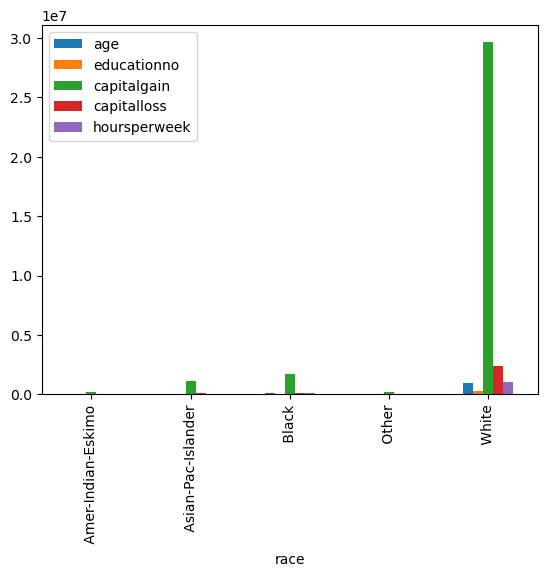

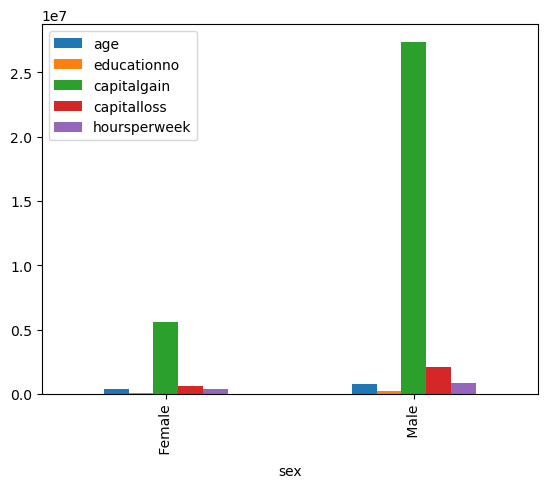

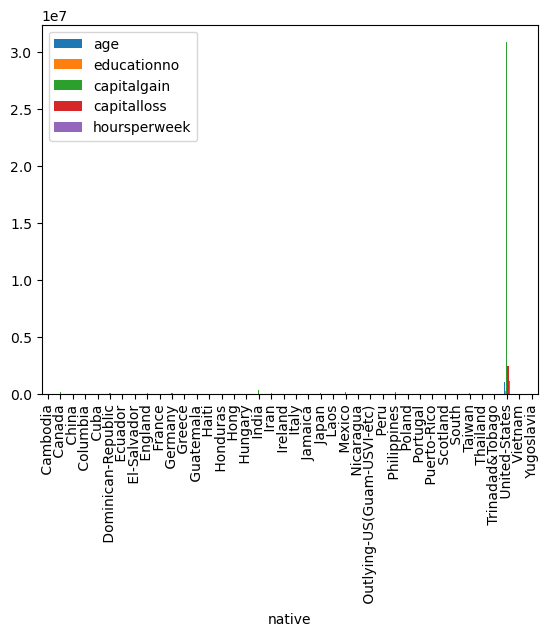

In [2]:
#Performing EDA on Train data
import matplotlib.pyplot as plt
t1 = df.groupby('workclass').sum()
t1.plot(kind='bar')
t2 = df.groupby('education').sum()
t2.plot(kind='bar')
t3 = df.groupby('maritalstatus').sum()
t3.plot(kind='bar')
t4 = df.groupby('education').sum()
t4.plot(kind='bar')
t5 = df.groupby('occupation').sum()
t5.plot(kind='bar')
t6 = df.groupby('relationship').sum()
t6.plot(kind='bar')
t7 = df.groupby('race').sum()
t7.plot(kind='bar')
t8 = df.groupby('sex').sum()
t8.plot(kind='bar')
t9 = df.groupby('native').sum()
t9.plot(kind='bar')

<AxesSubplot:xlabel='native'>

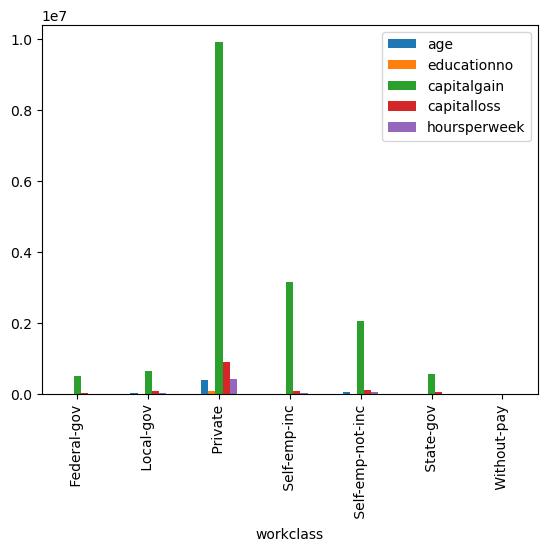

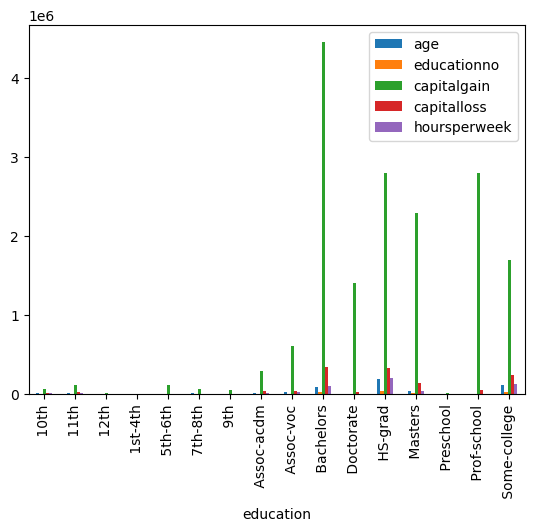

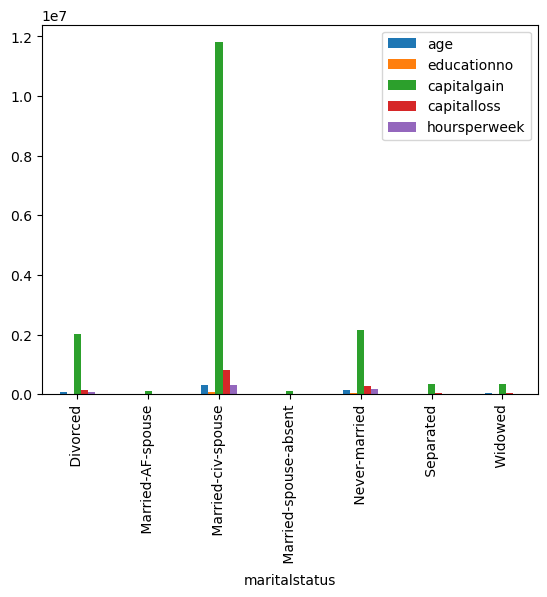

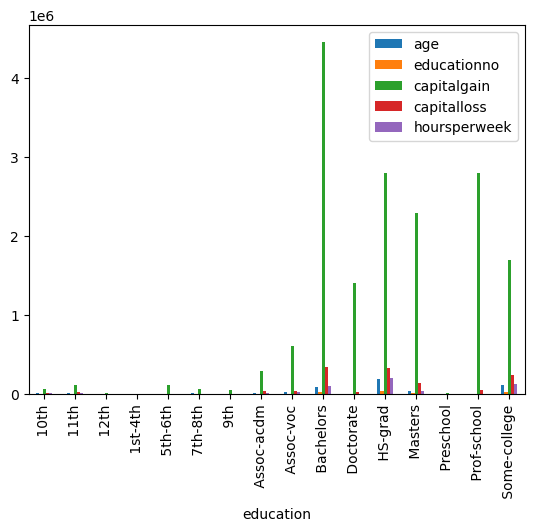

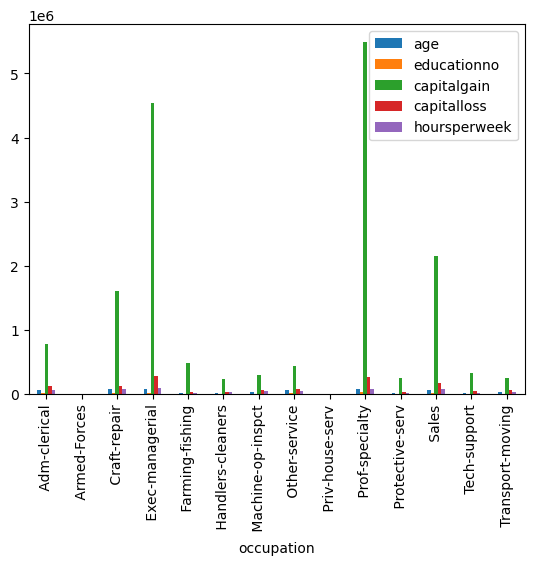

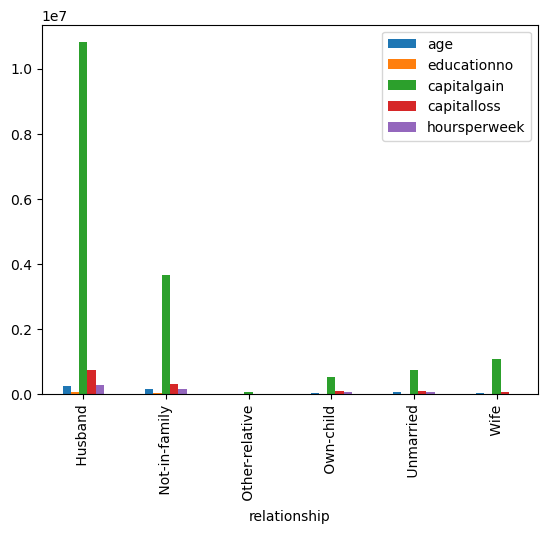

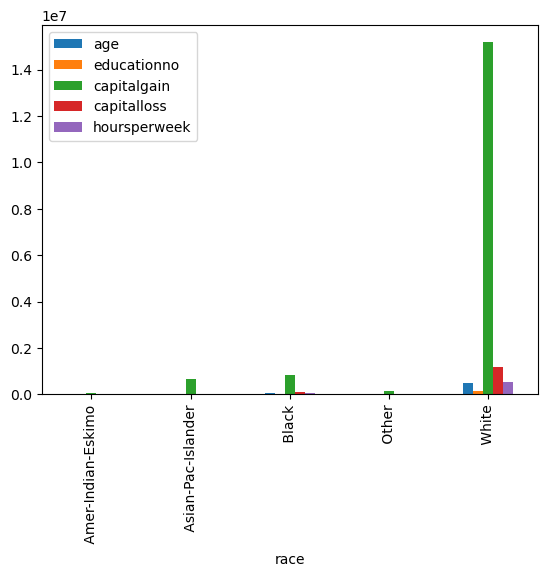

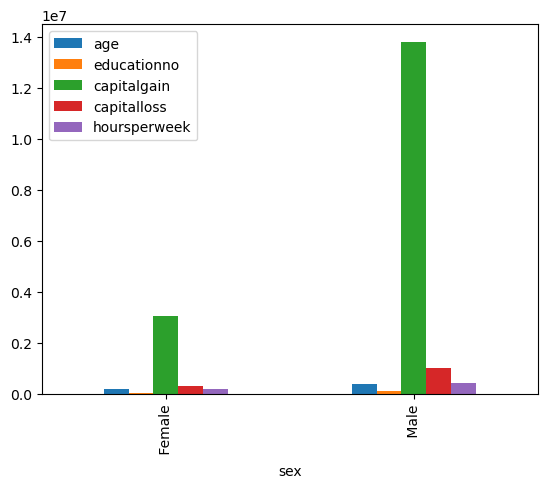

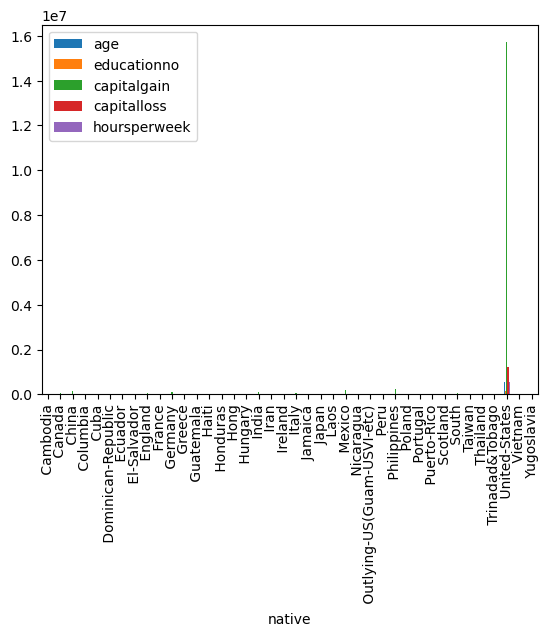

In [3]:
#Performing EDA on Test Data
t1 = df1.groupby('workclass').sum()
t1.plot(kind='bar')
t2 = df1.groupby('education').sum()
t2.plot(kind='bar')
t3 = df1.groupby('maritalstatus').sum()
t3.plot(kind='bar')
t4 = df1.groupby('education').sum()
t4.plot(kind='bar')
t5 = df1.groupby('occupation').sum()
t5.plot(kind='bar')
t6 = df1.groupby('relationship').sum()
t6.plot(kind='bar')
t7 = df1.groupby('race').sum()
t7.plot(kind='bar')
t8 = df1.groupby('sex').sum()
t8.plot(kind='bar')
t9 = df1.groupby('native').sum()
t9.plot(kind='bar')

In [26]:
#checking correlation
df.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513


In [27]:
df1.corr() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923


In [28]:
# Perform EDA 
df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [29]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [4]:
#using Label Encoding to tranform the data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['workclass'] = LE.fit_transform(df['workclass'])
df['education'] = LE.fit_transform(df['education'])
df['maritalstatus'] = LE.fit_transform(df['maritalstatus'])
df['occupation'] = LE.fit_transform(df['occupation'])
df.iloc[:,6] = LE.fit_transform(df.iloc[:,6])
df.iloc[:,7] = LE.fit_transform(df.iloc[:,7])
df.iloc[:,8] = LE.fit_transform(df.iloc[:,8])
df.iloc[:,12] = LE.fit_transform(df.iloc[:,12])
df1['workclass'] = LE.fit_transform(df1['workclass'])
df1['education'] = LE.fit_transform(df1['education'])
df1['maritalstatus'] = LE.fit_transform(df1['maritalstatus'])
df1['occupation'] = LE.fit_transform(df1['occupation'])
df1.iloc[:,6] = LE.fit_transform(df1.iloc[:,6])
df1.iloc[:,7] = LE.fit_transform(df1.iloc[:,7])
df1.iloc[:,8] = LE.fit_transform(df1.iloc[:,8])
df1.iloc[:,12] = LE.fit_transform(df1.iloc[:,12])
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [5]:
1#Splitting the variables
Y_train = df['Salary']
Y_test = df1['Salary']
X_train = df.iloc[:,0:13]
X_test = df1.iloc[:,0:13]
X_train.shape, X_test.shape

((30161, 13), (15060, 13))

In [24]:
#model fitting
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
Y_pred_train = MNB.predict(X_train)
Y_pred_test = MNB.predict(X_test)

In [25]:
#checking accrracy score for both train and test data
from sklearn.metrics import accuracy_score
print("Accuracy Score for train data : ", accuracy_score(Y_train, Y_pred_train).round(2))
print("Accuracy Score for test data : ", accuracy_score(Y_test,Y_pred_test).round(2))

Accuracy Score for train data :  0.77
Accuracy Score for test data :  0.77


In [ ]:
#using GussianNB for getting more accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
Y_pred_train = GNB.predict(X_train)
Y_pred_test = GNB.predict(X_test)
print("Accuracy Score for train data : ",accuracy_score(Y_train, Y_pred_train).round(2))
print("Accuracy Score for test data : ", accuracy_score(Y_test, Y_pred_test).round(2))

Accuracy Score for train data :  0.8
Accuracy Score for test data :  0.79


In [ ]:
# After exploring different naive bayes classifiers, categorical classifier model is best model because train and test accuracy is somewhat better than the rest of the classifiers.

## Comparing from the above Naive Bayes we conclude that the Gaussian Naive Bayes has more accuracy score than Multinominal Naive Bayes